In [ ]:
import os
print(os.getcwd())  # Check the current working directory

In [2]:
import pandas as pd
import numpy as np

In [3]:
## Load the data
data = pd.read_csv('recipes.csv')
data.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}


## Preprocessing the data

In [4]:
# remove columns id, ingredients_raw_str, serving_size,	servings, steps
data = data.drop(data.columns[[0, 4, 5, 6, 7]], axis=1)
data.head()

,name,description,ingredients,tags,search_terms
0,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}


In [5]:
import ast

In [6]:
# Function to clean and convert list/set columns to strings
def clean_text(value):
    if pd.isna(value):
        return ""
    if isinstance(value, str):
        try:
            parsed_value = ast.literal_eval(value)  # Convert string representations of lists/sets into real lists/sets
            if isinstance(parsed_value, (list, set)):
                return " ".join(parsed_value)  # Convert to space-separated string
        except (ValueError, SyntaxError):
            pass  # Keep as-is if not a list/set
    return str(value)  # Convert everything else to string

In [7]:
df = data.copy()

In [8]:
# Apply the cleaning function to the relevant columns
df["name"] = df["name"].astype(str) # Ensure it's a string
df["description"] = df["description"].astype(str)  # Ensure it's a string
# Convert list/set columns to strings
df["tags"] = df["tags"].apply(clean_text)
df["search_terms"] = df["search_terms"].apply(clean_text)
# Convert ingredient list from list format to a string with commas
df["ingredients"] = df["ingredients"].apply(lambda x: ', '.join(eval(x)) if isinstance(x, str) else x)
df.head()

,name,description,ingredients,tags,search_terms
0,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","water, grits, salt, cheddar cheese, garlic, ol...",time-to-make course main-ingredient preparatio...,low-carb vegetarian diabetic side low-calorie
1,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","onion, red bell pepper, garlic cloves, large s...",60-minutes-or-less time-to-make course main-in...,dinner shrimp
2,black-and-white bean salad,nan,"white beans, canned black beans, tomatoes, oni...",15-minutes-or-less time-to-make course main-in...,dinner vegetarian side vegan salad
3,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"zucchini, yellow squash, diced tomatoes, onion...",weeknight time-to-make course main-ingredient ...,vegetarian side italian
4,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"beef stew meat, flour, salt, allspice, cinnamo...",time-to-make course main-ingredient preparatio...,dinner


## Extracting the Country tags

In [9]:
# Load CSV and clean data
dictionary = pd.read_csv("demonyms.csv", header=None, names=["Adjective", "Country"])
dictionary = dictionary.dropna()  # Drop NaN values 
dictionary = dictionary[~dictionary["Country"].isin(["Africa", "Europe", "Asia"])]
dictionary.head()

,Adjective,Country
0,Aalborgenser,Aalborg
1,Aberdonian,Aberdeen
2,Abkhaz,Abkhazia
3,Abkhazian,Abkhazia
4,Abrenian,Abra


In [10]:
# # Create a combined dictionary (so that France, france, french -> France, etc.)
combined_keywords = {}
for adjective, country in zip(dictionary["Adjective"], dictionary["Country"]):
    combined_keywords[adjective.lower()] = country  # Store adjective → country
    combined_keywords[country.lower()] = country    # Store country → country

# Display first few entries
print(list(combined_keywords.items())[:10])  # To check output

[('aalborgenser', 'Aalborg'), ('aalborg', 'Aalborg'), ('aberdonian', 'Aberdeen'), ('aberdeen', 'Aberdeen'), ('abkhaz', 'Abkhazia'), ('abkhazia', 'Abkhazia'), ('abkhazian', 'Abkhazia'), ('abrenian', 'Abra'), ('abra', 'Abra'), ('abruzzese', 'Abruzzo')]


In [11]:
import string
import re

In [12]:
# Function to detect country mentions
def extract_country(text):
    if pd.isna(text):
        return None
    text = text.lower()

    # Remove punctuation and extra spaces
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = " ".join(text.split())

    # Check for country matches in the combined dictionary
    found_countries = {combined_keywords[word] for word in text.split() if word in combined_keywords}
    return ", ".join(found_countries) if found_countries else None


In [13]:
# Function to extract country mentions
def extract_country(text):
    if pd.isna(text):
        return None
    text = text.lower()
    
    # Remove punctuation and extra spaces
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = " ".join(text.split())

    # Extract country mentions
    found_countries = {combined_keywords[word] for word in text.split() if word in combined_keywords}
    return ", ".join(found_countries) if found_countries else None

# Apply function to multiple columns and combine results
df["country_tags"] = df[["name", "description", "tags", "search_terms"]].apply(
    lambda row: ", ".join(filter(None, {extract_country(row[col]) for col in row.index})) or None, axis=1
)

# Display the first few rows
df.head()

,name,description,ingredients,tags,search_terms,country_tags
0,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","water, grits, salt, cheddar cheese, garlic, ol...",time-to-make course main-ingredient preparatio...,low-carb vegetarian diabetic side low-calorie,None
1,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","onion, red bell pepper, garlic cloves, large s...",60-minutes-or-less time-to-make course main-in...,dinner shrimp,None
2,black-and-white bean salad,nan,"white beans, canned black beans, tomatoes, oni...",15-minutes-or-less time-to-make course main-in...,dinner vegetarian side vegan salad,"Togo, United States"
3,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"zucchini, yellow squash, diced tomatoes, onion...",weeknight time-to-make course main-ingredient ...,vegetarian side italian,Italy
4,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"beef stew meat, flour, salt, allspice, cinnamo...",time-to-make course main-ingredient preparatio...,dinner,Seattle


In [14]:
# display rows with country tags kazakhstan
df[df['country_tags'].str.contains("United Kingdom", na=False)]

,name,description,ingredients,tags,search_terms,country_tags
353,Beef and Potato Stew,A hearty simple recipe cooked on the stove on ...,"onions, minced beef, new potatoes, olive oil, ...",time-to-make course cuisine preparation occasi...,dinner english beef stew,"England, United Kingdom"
875,Curry Powder Trio (Take Yer Pick!),Three curry powder mixtures. British manufactu...,"ground coriander, besan flour, ground cumin, f...",15-minutes-or-less time-to-make course main-in...,indian vegetarian vegan,"Caribbean, India, France, Japan, United Kingdo..."
960,The Godfather of Grilled Cheese Sandwiches,There are times in our daily lives when we jus...,"cream cheese, blue cheese, bacon, fresh tomato...",30-minutes-or-less time-to-make course prepara...,sandwich lunch,"United Kingdom, Italy"
1762,Elimination Diet Salad Dressing,I hate eating plain salads. Even oil dressings...,"soft silken tofu, soymilk, tahini, sunflower o...",lactose 15-minutes-or-less time-to-make course...,gluten-free vegetarian vegan lactose-free sala...,United Kingdom
2730,Mike Harcourt's Cobbler,This wonderful recipe comes from the former Br...,"apples, granulated sugar, water, lemon juice, ...",60-minutes-or-less time-to-make course main-in...,low-sodium dessert,United Kingdom
...,...,...,...,...,...,...
493122,"Shrimp, Mango and Avocado Salad W/ Passion Fru...",I have been on a big fruit and salad kick over...,"gem lettuce, mangoes, cherry tomatoes, small s...",15-minutes-or-less time-to-make course main-in...,dinner diabetic caribbean salad appetizer mexi...,"Caribbean, Mexico, London, United Kingdom, Car..."
493140,Pimm's and Strawberry Jellies,Pimm's is a typically British summer drink. Th...,"gelatin, lemonade, gin, lemon%2c juice of, lim...",time-to-make course main-ingredient cuisine pr...,english dessert,"England, United Kingdom"
493317,Rich Scones,This is my favorite scone recipe. It comes fr...,"all-purpose flour, baking powder, salt, lard, ...",30-minutes-or-less time-to-make course prepara...,bread,United Kingdom
493995,Shrimp Paste,Adapted from 'Great British Cooking' by Jane G...,"shrimp, olive oil, lime%2c juice of, cayenne p...",15-minutes-or-less time-to-make course main-in...,low-carb dinner shrimp appetizer english,"England, United Kingdom"


In [15]:
# drop rows with no country_tags and no ingredients
df = df.dropna(subset=["country_tags", "ingredients"])
# drop columns description, tags, search_terms
df = df.drop(columns=["name","description", "tags", "search_terms"])

In [16]:
clean_df = df.copy()
clean_df.head(10)

,ingredients,country_tags
2,"white beans, canned black beans, tomatoes, oni...","Togo, United States"
3,"zucchini, yellow squash, diced tomatoes, onion...",Italy
4,"beef stew meat, flour, salt, allspice, cinnamo...",Seattle
7,"eggs, milk, fresh sage, fresh thyme, garlic cl...","Australia, Parma"
9,"lean ground beef, ketchup, heinz chili sauce, ...",Hamburg
13,"button mushrooms, portabella mushrooms, olive ...",Italy
14,"shortcake cups, ice cream, hot fudge, whipped ...",United States
15,"vegetable oil, vegetable oil, corn on the cob,...",United States
16,"butter, shallots, prawns, garlic clove, gruyer...",Switzerland
17,"water, low sodium chicken broth, plantains, un...",Caribbean


In [17]:
# check if there's Kazakhstan in the country_tags
clean_df[clean_df["country_tags"].str.contains("England")]

,ingredients,country_tags
32,"egg yolks, caster sugar, cream cheese, lime cu...",England
71,"vegetable oil, green onions, eggs, milk, all-p...","England, California, England, United States"
145,"rose petals, jasmine flower, tap water","China, Nice, England, France"
353,"onions, minced beef, new potatoes, olive oil, ...","England, United Kingdom"
443,"bacon, hard-cooked eggs, mayonnaise, yellow mu...",England
...,...,...
494428,"butter beans, olive oil, onion, black mustard ...",England
494749,"floury potatoes, butter, leeks, milk, coarse g...",England
494791,"boneless skinless chicken breasts, sage derby ...","England, United Kingdom"
494808,"active dry yeast, warm water, shortening, suga...",England


In [18]:
clean_df.shape

(238366, 2)

In [19]:
# display unique values in country_tags
clean_df["country_tags"].nunique()

18345

## Cleaning tags (keep Countries only)

In [20]:
import pycountry

In [21]:
# replace England with United Kingdom
clean_df["country_tags"] = clean_df["country_tags"].str.replace("England", "United Kingdom")

In [22]:
# Get a set of valid country names
valid_countries = {country.name for country in pycountry.countries}

In [23]:
# Function to clean country tags
def clean_country_tags(tags):
    if pd.isna(tags):
        return None
    country_list = [country.strip() for country in tags.split(",")]
    country_list = [country for country in country_list if country in valid_countries]  # Keep only real countries
    return ", ".join(country_list) if country_list else None

In [24]:
# Apply function
clean_df["country_tags"] = clean_df["country_tags"].apply(clean_country_tags)

In [25]:
# Drop rows with no valid country tags
clean_df = clean_df.dropna(subset=["country_tags"])
clean_df.head(10)

,ingredients,country_tags
2,"white beans, canned black beans, tomatoes, oni...","Togo, United States"
3,"zucchini, yellow squash, diced tomatoes, onion...",Italy
7,"eggs, milk, fresh sage, fresh thyme, garlic cl...",Australia
13,"button mushrooms, portabella mushrooms, olive ...",Italy
14,"shortcake cups, ice cream, hot fudge, whipped ...",United States
15,"vegetable oil, vegetable oil, corn on the cob,...",United States
16,"butter, shallots, prawns, garlic clove, gruyer...",Switzerland
18,"pickling cucumbers, kosher salt, garlic, coria...","Italy, United States"
19,"elbow macaroni, ground beef, onion, chili with...","United States, Mexico"
21,"coriander, ginger, cardamom, cumin, cinnamon, ...",Morocco


In [26]:
clean_df.shape

(193940, 2)

## Cleaning the Ingredients column

In [27]:
from nltk.stem import WordNetLemmatizer
import nltk
from fuzzywuzzy import process

nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
def normalize_ingredient(ingredient_list):
    ingredients = ingredient_list.lower().split(", ")  # Lowercase & split
    normalized = []
    
    for ing in ingredients:
        lemmatized = lemmatizer.lemmatize(ing)  # Singular form
        normalized.append(lemmatized)
    
    return ", ".join(set(normalized))  # Remove duplicates

In [29]:
# OLD CODE
clean_df["ingredients"] = clean_df["ingredients"].apply(normalize_ingredient)
clean_df.head(10)

,ingredients,country_tags
2,"tomato, table salt, black pepper, italian pars...","Togo, United States"
3,"green bell pepper, garlic, salt and pepper, di...",Italy
7,"egg, fresh thyme, asparagus, pecorino cheese, ...",Australia
13,"salt, fresh ground black pepper, 1%25 low-fat ...",Italy
14,"hot fudge, whipped cream, ice cream, strawberr...",United States
15,"blue corn tortilla chips, vegetable oil, yello...",United States
16,"pear cider, vegetable, shallot, fresh parsley,...",Switzerland
18,"garlic, coriander seed, grape leaves, pickling...","Italy, United States"
19,"ground beef, salt, corn chips, elbow macaroni,...","United States, Mexico"
21,"clove, mace, cardamom, turmeric, ginger, cumin...",Morocco


### Analysis

In [30]:
# Expand country tags into multiple rows
df_expanded = clean_df.assign(country_tags=df["country_tags"].str.split(", ")).explode("country_tags")

# Expand ingredients into multiple rows
df_expanded = df_expanded.assign(ingredients=df_expanded["ingredients"].str.split(", ")).explode("ingredients")

# Count occurrences of each ingredient per country
ingredient_counts = df_expanded.groupby(["country_tags", "ingredients"]).size().reset_index(name="count")

# Show the results
ingredient_counts.head(10)


,country_tags,ingredients,count
0,Aberdeen,brown rice,1
1,Aberdeen,brown sugar,1
2,Aberdeen,butter,4
3,Aberdeen,celery salt,1
4,Aberdeen,cheddar cheese,1
5,Aberdeen,finnan haddie,1
6,Aberdeen,fresh yeast,2
7,Aberdeen,garlic salt,1
8,Aberdeen,ground beef,1
9,Aberdeen,honey,1


In [31]:
# check if there's united states in the country_tags
df_expanded[df_expanded["country_tags"].str.contains("United States")]

,ingredients,country_tags
2,tomato,United States
2,table salt,United States
2,black pepper,United States
2,italian parsley,United States
2,white beans,United States
...,...,...
494962,basil,United States
494962,oregano,United States
494962,zucchini,United States
494962,onion,United States


In [48]:
# Get the total number of countries
total_countries = df_expanded["country_tags"].nunique()
# Filter out ingredients that are common to more than 50% of the countries
ingredient_counts = ingredient_counts[
    ingredient_counts.groupby("ingredients")["country_tags"].transform("nunique") < 0.4 * total_countries
]

In [49]:
ingredient_matrix = ingredient_counts.pivot_table(
    index="country_tags",  # Countries as rows
    columns="ingredients",  # Ingredients as columns
    values="count",  # Frequency of each ingredient
    aggfunc="sum",  # Sum the count for duplicate ingredient-country pairs
    fill_value=0  # Fill NaN with 0 (meaning the ingredient is not present in that country)
)

# Show the first few rows of the matrix
ingredient_matrix.head()

ingredients,,%288 oz.%29 green beans,%28about 4 oz.%29 shiitake mushrooms%2c stemmed and cut into half-inch slices,%28about 8 oz.%29 small white mushrooms cut into half-inch slices,%28dijon%29 mustard,1%25 fat buttermilk,1%25 fat cottage cheese,1%25 low-fat chocolate milk,1%25 low-fat milk,10 bean soup mix,...,ziploc bag,ziploc bags,ziti pasta,ziti rigati,zoom quick hot cereal,zucchini,zucchini with italian-style tomato sauce,zwieback cookies,zwieback toast,zwieback toast crumbs
country_tags,,,,,,,,,,,,,,,,,,,,,
Aberdeen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abkhazia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abruzzo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acadia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acadie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Get the 15 most common ingredients per country
top_ingredients = ingredient_matrix.apply(lambda x: x.nlargest(15).index.tolist(), axis=1)
# Show the top ingredients for each country
top_ingredients.head()

country_tags
Aberdeen    [fresh yeast, lard, plain flour, brown rice, c...
Abkhazia    [walnut, cilantro, dill, jalapeno, clove, cori...
Abruzzo     [dry white wine, lamb, parmigiano-reggiano che...
Acadia      [vanilla, baking soda, bell pepper, dried oreg...
Acadie      [apple cider, baking soda, boiling water, chil...
dtype: object

In [51]:
# Create a DataFrame from the top ingredients
top_ingredients_df = top_ingredients.reset_index()
# Rename the columns
top_ingredients_df.columns = ["Country", "Top Ingredients"]
# Show the DataFrame
top_ingredients_df.head(10)

,Country,Top Ingredients
0,Aberdeen,"[fresh yeast, lard, plain flour, brown rice, c..."
1,Abkhazia,"[walnut, cilantro, dill, jalapeno, clove, cori..."
2,Abruzzo,"[dry white wine, lamb, parmigiano-reggiano che..."
3,Acadia,"[vanilla, baking soda, bell pepper, dried oreg..."
4,Acadie,"[apple cider, baking soda, boiling water, chil..."
5,Aceh,"[coriander seed, fresh ginger, fresh turmeric,..."
6,Acre,"[american cheese, baby spinach leaves, baguett..."
7,Adelaide,"[caster sugar, cream, bacon, bay leaves, black..."
8,Aegina,"[dried lavender, pistachio, thyme honey, , %28..."
9,Afghanistan,"[ground coriander, ground cardamom, ground bla..."


In [52]:
# check if there's united states in specific ingredients
top_ingredients_df[top_ingredients_df["Country"].str.contains("United States")]


,Country,Top Ingredients
730,United States,"[garlic powder, baking soda, sour cream, vanil..."


## Mapping them on the countries

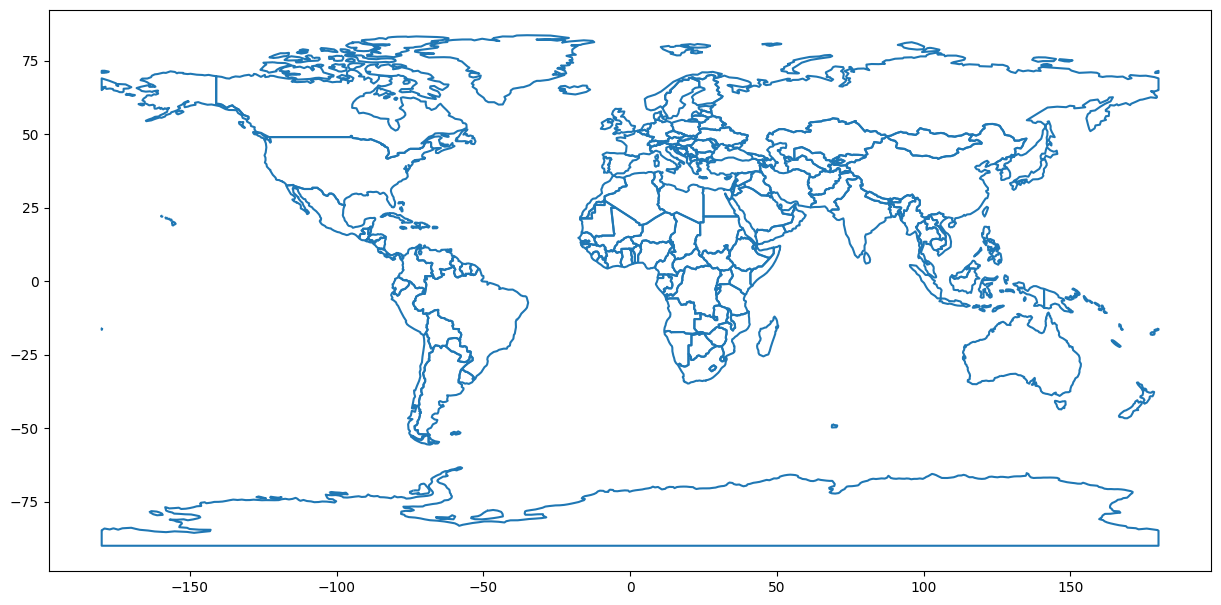

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoPandas world map
world = gpd.read_file('countries.shp')
# Reproject the geometries to a projected CRS (for better centroid calculation)
world = world.to_crs(epsg=3395)  # Using EPSG:3395 (World Mercator projection)

# Calculate the centroids using the reprojected geometries
world['centroid'] = world['geometry'].centroid

# revert back to the original CRS (lat/lon) after centroid calculation
world = world.to_crs(epsg=4326)  # Reverting to WGS84 (lat/lon)
# Plot the base map of the world

fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
plt.show()

###  Assign Country Coordinates

In [54]:
import warnings

In [55]:
# Suppress only the specific UserWarning from GeoPandas
warnings.filterwarnings("ignore", category=UserWarning, message="Geometry is in a geographic CRS*")

# GeoPandas world map has a 'geometry' column, we can extract the centroid (center) of each country
world['centroid'] = world['geometry'].centroid

In [56]:
from fuzzywuzzy import process

In [57]:


# Create a mapping of country names using fuzzy matching
def get_best_match(country):
    match = process.extractOne(country, world['NAME'].tolist())  # Convert Series to list
    if match is None:
        return None
    best_match, score = match
    return best_match if score > 80 else None  # Only accept matches with high confidence


top_ingredients_df['Country_Matched'] = top_ingredients_df['Country'].apply(get_best_match)

# Now map centroids using matched country names
top_ingredients_df['coordinates'] = top_ingredients_df['Country_Matched'].map(
    lambda x: world.loc[world['NAME'] == x, 'centroid'].iloc[0] if x else None
)


In [58]:
# check if there's united states in the country_tags
top_ingredients_df[top_ingredients_df["Country"].str.contains("United States")]

,Country,Top Ingredients,Country_Matched,coordinates
730,United States,"[garlic powder, baking soda, sour cream, vanil...",United States of America,POINT (-112.59943591150441 45.7056280021518)


In [59]:
top_ingredients_df.head(10)

,Country,Top Ingredients,Country_Matched,coordinates
0,Aberdeen,"[fresh yeast, lard, plain flour, brown rice, c...",None,None
1,Abkhazia,"[walnut, cilantro, dill, jalapeno, clove, cori...",None,None
2,Abruzzo,"[dry white wine, lamb, parmigiano-reggiano che...",None,None
3,Acadia,"[vanilla, baking soda, bell pepper, dried oreg...",None,None
4,Acadie,"[apple cider, baking soda, boiling water, chil...",None,None
5,Aceh,"[coriander seed, fresh ginger, fresh turmeric,...",None,None
6,Acre,"[american cheese, baby spinach leaves, baguett...",None,None
7,Adelaide,"[caster sugar, cream, bacon, bay leaves, black...",None,None
8,Aegina,"[dried lavender, pistachio, thyme honey, , %28...",None,None
9,Afghanistan,"[ground coriander, ground cardamom, ground bla...",Afghanistan,POINT (66.08669022192834 33.856399281690756)


In [60]:
# number of countries with missing coordinates
top_ingredients_df["coordinates"].isnull().sum()

np.int64(608)

In [61]:
# Drop rows with missing coordinates
top_ingredients_df = top_ingredients_df.dropna(subset=["coordinates"])
top_ingredients_df.head(10)

,Country,Top Ingredients,Country_Matched,coordinates
9,Afghanistan,"[ground coriander, ground cardamom, ground bla...",Afghanistan,POINT (66.08669022192834 33.856399281690756)
15,Albania,"[feta cheese, baking soda, yogurt, cucumber, o...",Albania,POINT (20.032426431443216 41.141353306048785)
21,Algeria,"[ground cumin, plain flour, ras el hanout spic...",Algeria,POINT (2.5980477916183444 28.18548127865754)
26,Americas,"[parmesan cheese, low sodium chicken broth, so...",United States of America,POINT (-112.59943591150441 45.7056280021518)
29,Andaman And Nicobar Islands,"[almond, barbecue sauce, black beans, cheddar ...",Bosnia and Herz.,POINT (17.81688327039009 44.18076776297469)
33,Angola,"[bay leaves, lime, palm oil, salt %26 freshly ...",Angola,POINT (17.47057255231345 -12.245869036133183)
36,Antarctica,"[baking soda, cold water, sushi rice, whole wh...",Antarctica,POINT (20.57100056984265 -80.49198288284346)
46,Argentina,"[red wine vinegar, crushed red pepper flakes, ...",Argentina,POINT (-65.17536077114174 -35.44682148949513)
50,Armenia,"[green pepper, chicken broth, cucumber, feta c...",Armenia,POINT (45.000290011014776 40.216607612301424)
61,Australia,"[caster sugar, plain flour, cream, parmesan ch...",Australia,POINT (134.50277547536612 -25.7306547797261)


## Plot the Data on the Map

In [62]:
import folium

# Initialize the base map
m = folium.Map(location=[20,0], zoom_start=2)

# Iterate through the DataFrame and add a marker for each country with top ingredients
for i, row in top_ingredients_df.iterrows():
    country_name = row['Country_Matched']
    coordinates = row['coordinates']
    top_ingredients = ', '.join(row['Top Ingredients'])

    folium.Marker(
        location=[coordinates.y, coordinates.x],
        popup=f"{country_name}: {top_ingredients}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Show the map
m.save('top_ingredients_map.html')

Limitations: Turkey